In [1]:
%matplotlib inline
import sys
sys.path.append("..")

import os
import gzip
import torch 
import numpy as np
from tqdm import tqdm
from skimage import io
from pathlib import Path
import albumentations as A
import matplotlib.pyplot as plt
from torchsummary import summary
from torchvision import transforms
from skimage.transform import resize
from PIL import Image, ImageSequence
from torch.utils.data import DataLoader
from os.path import join, abspath as abs
from torch.utils.data import random_split
from albumentations.pytorch.transforms import ToTensorV2

from unet.datasets import ISBI, DS_Bowl
from unet.utils import *
from unet.models import UNet, UNetplus, UNetplusplus
from run import train_IDBI

ISBI_ = abs("../data/isbi")
BOWL_ = abs("../data/nuclei")
BRATS_ = abs("../data/brats13")
LITS_ = abs("../data/lits")
IMG_H, IMG_W = 256, 256

In [2]:
train_path = join(ISBI_, "train")
val_path = join(ISBI_, "val")

augs = A.Compose([
    A.Resize(IMG_H, IMG_W),
    A.RandomBrightnessContrast(brightness_by_max=False, p=0.5),
    A.Flip(p=0.5),
    #A.ElasticTransform(p=0.5),
    A.GridDistortion(p=0.5), 
    A.Rotate(p=0.5),
], p=1)

train_d = ISBI(train_path, augs)
train_dl = DataLoader(train_d, batch_size=1, shuffle=True)
# img, mask = train_d.__getitem__(10)
# visualize(img.squeeze(0), mask)

val_d = ISBI(val_path, augs)
val_dl = DataLoader(val_d, batch_size=1, shuffle=True)

train_features, train_labels = next(iter(train_dl))
val_features, val_labels = next(iter(val_dl))
print("Training batch shape:", train_features.size(), train_labels.size())
print("Validation batch shape:", val_features.size(), val_labels.size())

Training batch shape: torch.Size([1, 1, 256, 256]) torch.Size([1, 1, 256, 256])
Validation batch shape: torch.Size([1, 1, 256, 256]) torch.Size([1, 1, 256, 256])


In [3]:
# normal unet
unet = UNet(1, 1)
# summary(model, (1, 128, 128))
train_IDBI(unet, train_dl, val_dl, abs("unet.pth"), epochs=1)

# wide unet
filters = [35, 70, 140, 280, 560]
w_unet = UNet(1, 1, filters)
train_IDBI(w_unet, train_dl, val_dl, abs("w_unet.pth"), epochs=1)

# unet+ without deep supervision
unet_p = UNetplus(1, 1)
train_IDBI(unet_p, train_dl, val_dl, abs("unet_p.pth"), epochs=1)

# unet+ with deep supervision
unet_p_ds = UNetplus(1, 1, ds=True)
train_IDBI(unet_p_ds, train_dl, val_dl, abs("unet_p_ds.pth"), ds=True, epochs=1)

# unet++ without deep supervision
unet_pp = UNetplusplus(1, 1)
train_IDBI(unet_pp, train_dl, val_dl, abs("unet_pp.pth"), epochs=1)

# unet++ with deep supervision
unet_pp_ds = UNetplusplus(1, 1, ds=True)
train_IDBI(unet_pp_ds, train_dl, val_dl, abs("unet_pp_ds.pth"), ds=True, epochs=1)

2021-06-30 16:43:35,825 - UNet++ - DEBUG - Started training for 1 epochs
2021-06-30 16:44:58,629 - UNet++ - DEBUG - Epoch 1 	 Training Loss: 0.654029130935669 	 Validation Loss: 0.6377770900726318
2021-06-30 16:45:06,471 - UNet++ - DEBUG - Mean IOU: 0.8060455322561578 	 Mean Dice Coef: 0.6545302607339398
2021-06-30 16:45:06,503 - UNet++ - DEBUG - Started training for 1 epochs
2021-06-30 16:45:42,023 - UNet++ - DEBUG - Epoch 1 	 Training Loss: 0.6480385065078735 	 Validation Loss: 0.6407397389411926
2021-06-30 16:45:45,248 - UNet++ - DEBUG - Mean IOU: 0.8055038452445215 	 Mean Dice Coef: 0.649047906460731
2021-06-30 16:45:45,389 - UNet++ - DEBUG - Started training for 1 epochs
2021-06-30 16:50:37,539 - UNet++ - DEBUG - Epoch 1 	 Training Loss: 0.6976767778396606 	 Validation Loss: 0.6978675127029419
2021-06-30 16:51:03,103 - UNet++ - DEBUG - Mean IOU: 1.8931720727792966e-10 	 Mean Dice Coef: 0.6140901635000251
2021-06-30 16:51:03,247 - UNet++ - DEBUG - Started training for 1 epochs
2021

In [ ]:
model_loc = os.path.join('/gdrive', 'MyDrive', 'Assignment 2', 'models')

# normal unet
unet = UNet(1, 1)
# summary(model, (1, 128, 128))
train_IDBI(unet, train_dl, val_dl, join(model_loc, "unet.pth"), epochs=1)

# wide unet
filters = [35, 70, 140, 280, 560]
w_unet = UNet(1, 1, filters)
train_IDBI(w_unet, train_dl, val_dl, join(model_loc, "w_unet.pth"), epochs=1)

# unet+ without deep supervision
unet_p = UNetplus(1, 1)
train_IDBI(unet_p, train_dl, val_dl, join(model_loc, "unet_p.pth"), epochs=1)

# unet+ with deep supervision
unet_p_ds = UNetplus(1, 1, ds=True)
train_IDBI(unet_p_ds, train_dl, val_dl, join(model_loc, "unet_p_ds.pth"), ds=True, epochs=1)

# unet++ without deep supervision
unet_pp = UNetplusplus(1, 1)
train_IDBI(unet_pp, train_dl, val_dl, join(model_loc, "unet_pp.pth"), epochs=1)

# unet++ with deep supervision
unet_pp_ds = UNetplusplus(1, 1, ds=True)
train_IDBI(unet_pp_ds, train_dl, val_dl, join(model_loc, "unet_pp_ds.pth"), ds=True, epochs=1)

Training batch shape: torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
Validation batch shape: torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])


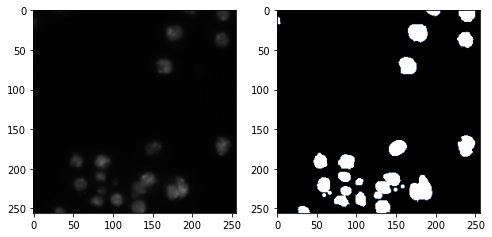

In [5]:
iaugs = A.Compose([
    A.Resize(IMG_H, IMG_W), 
    #A.Normalize(mean = [0.5,0.5,0.5], std = [0.5,0.5,0.5])
], p=1)

maugs = A.Compose([
    A.Resize(IMG_H, IMG_W, interpolation=Image.NEAREST)
], p=1)

# bowl_ds = DS_Bowl(BOWL_, iaugs, maugs)
img, mask = bowl_ds.__getitem__(0)
visualize(img.reshape(IMG_H, IMG_W, 3), mask.squeeze(0))

length = bowl_ds.__len__()
splits = [int(length - 0.2*length), int(0.2*length)] 
bowl_train, bowl_val = random_split(bowl_ds, splits, generator=torch.Generator().manual_seed(42))

bowl_tdl = DataLoader(bowl_train, batch_size=4, shuffle=True)
bowl_vdl = DataLoader(bowl_val, batch_size=4, shuffle=True)

train_features, train_labels = next(iter(bowl_tdl))
val_features, val_labels = next(iter(bowl_vdl))
print("Training batch shape:", train_features.size(), train_labels.size())
print("Validation batch shape:", val_features.size(), val_labels.size())

In [8]:
# normal unet
unet = UNet(3, 1, 2)
# summary(model, (1, 128, 128))
train_IDBI(unet, bowl_tdl, bowl_vdl, abs("unet.pth"), epochs=1)

# wide unet
filters = [35, 70, 140, 280, 560]
w_unet = UNet(3, 1, filters)
train_IDBI(w_unet, bowl_tdl, bowl_vdl, abs("w_unet.pth"), epochs=1)

# unet+ without deep supervision
unet_p = UNetplus(3, 1)
train_IDBI(unet_p, bowl_tdl, bowl_vdl, abs("unet_p.pth"), epochs=1)

# unet+ with deep supervision
unet_p_ds = UNetplus(3, 1, ds=True)
train_IDBI(unet_p_ds, bowl_tdl, bowl_vdl, abs("unet_p_ds.pth"), ds=True, epochs=1)

# unet++ without deep supervision
unet_pp = UNetplusplus(3, 1)
train_IDBI(unet_pp, bowl_tdl, bowl_vdl, abs("unet_pp.pth"), epochs=1)

# unet++ with deep supervision
unet_pp_ds = UNetplusplus(3, 1, ds=True)
train_IDBI(unet_pp_ds, bowl_tdl, bowl_vdl, abs("unet_pp_ds.pth"), ds=True, epochs=1)

2021-06-30 21:00:13,722 - UNet++ - INFO - Started training for unet.pth for 1 epochs
2021-06-30 21:05:53,225 - UNet++ - DEBUG - Epoch 1 	 Training Loss: 0.3704853057861328 	 Validation Loss: 0.40036439895629883
2021-06-30 21:06:16,651 - UNet++ - DEBUG - Mean IOU: 0.22317582368850708 	 Mean Dice Coef: 0.16765913625726764
2021-06-30 21:06:16,704 - UNet++ - INFO - Started training for w_unet.pth for 1 epochs


KeyboardInterrupt: 

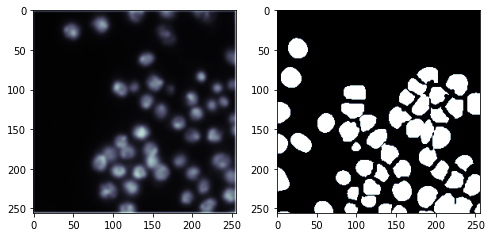

In [27]:
visualize(o[2][0].detach().numpy(), y_train[2])